In [7]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
from icecream import ic

import numpy as np
from src.dataset import (
    MultipleDates,
    PA, PADeforestationTime, PADistanceMap, PAMultipleDates,
    MTDeforestationTime,
    MTMultipleDates
)

# from src.dataset_legacy import MTDeforestationTime
from src import training_generator as generator
from src.patchesHandler import PatchesHandler, PatchesHandlerMultipleDates, PatchesHandlerEvidential

from src.trainer.evidential import TrainerEvidential, TrainerEvidentialUEO
import src.trainer.evidential as evidential

from mpl_toolkits.axes_grid1 import make_axes_locatable

import cv2
from src import metrics as _metric
from src.trainer.evidential import getMassFcn2D

In [9]:
import pickle
# filename = 'log_evidential_dirichletplot1.pkl'

filenames = ['log_evidential_wmse_pa.pkl']

# filenames = ['log_evidential_wdice_mt.pkl']

filenames = ['log_wdice_pastdate_pa.pkl'] # wdice pa
filenames = ['log_evidential_wdice_mt_early_date.pkl', 'log_evidential_wdice_mt_early_date2.pkl'] # wdice mt early date



filenames = [
    'log_evidential_dirichletplot1_pa.pkl',
    'log_evidential_dirichletplot2_pa.pkl'
             ]

# filenames = ['log_mcd_classesmode_true_pa.pkl']
# filenames = ['log_mcd_classesmode_false_pa.pkl']

filenames = ['log_single_run_classesmodetrue_pa.pkl']
filenames = ['log_single_run_classesmodefalse_pa.pkl']

filenames = ['log_wdice_pastdate_pa.pkl']
filenames = ['log_mcd_classesmode_true_pa_early_date.pkl']

filenames = ['log_mcd.pkl']
results = []
for filename in filenames:
    with open(filename, 'rb') as handle:
        results.extend(pickle.load(handle))
        print(len(results))
# print(results)
# print(len(results))

3


In [ ]:
results[0]

{'other_uncertainty_metrics': {'sUEO': 0.3845722890780702, 'ece_score': 0},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': 0.0,
   'alpha': array([132.42505,   1.     ,   1.     ], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 0,
   'coords': [800, 200],
   'reference': 1,
   'predicted': 1.0,
   'alpha': array([ 1.     , 49.57395,  1.     ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [550, 115],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1.       , 1.5210117, 1.       ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [430, 950],
   'reference': 0,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)}],
 'uncertainty_result': {'metrics': {

In [ ]:
results[-1]

{'other_uncertainty_metrics': {'sUEO': 0.41852756084078635,
  'ece_score': 0.10091987545327072},
 'snippet_poi_results': [{'snippet_id': 0,
   'coords': [550, 550],
   'reference': 0,
   'predicted': 0.0,
   'alpha': array([33.42052,  1.     ,  1.     ], dtype=float32)},
  {'snippet_id': 0,
   'coords': [210, 610],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1.       , 1.5123345, 1.       ], dtype=float32)},
  {'snippet_id': 0,
   'coords': [207, 617],
   'reference': 1,
   'predicted': 0.0,
   'alpha': array([1., 1., 1.], dtype=float32)},
  {'snippet_id': 0,
   'coords': [800, 200],
   'reference': 1,
   'predicted': 1.0,
   'alpha': array([ 1.      , 13.133177,  1.      ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [550, 115],
   'reference': 1,
   'predicted': 1.0,
   'alpha': array([1.       , 4.3822217, 1.       ], dtype=float32)},
  {'snippet_id': 1,
   'coords': [430, 950],
   'reference': 0,
   'predicted': 1.0,
   'alpha': array([ 1.      , 10.556276,  1.

In [10]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        # print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # if result['uncertainty_result']['metrics']['f1'] > 0:
        if True:
        
            print("exp_id,",result['uncertainty_result']['exp'])
            print("idx: {}, other uncertainty metrics: {}".format(idx, result['other_uncertainty_metrics']))
            print("f1: {}".format(result['uncertainty_result']['metrics']['f1']))
            print("f1_L: {}, f1_H: {}, f1_audit: {}".format(
                result['uncertainty_result']['metrics']['f1_L'],
                result['uncertainty_result']['metrics']['f1_H'],
                result['uncertainty_result']['metrics_audited']['f1']))
            print("UEO",result['uncertainty_result']['metrics']['UEO'])


            
            # plt.figure()
            # getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)

exp_id, 103
idx: 0, other uncertainty metrics: {'sUEO': 0.41257279666343327, 'ece_score': 0.03832625365886703}
f1: 84.67
f1_L: [0.95396171], f1_H: [0.69628358], f1_audit: [0.9739713]
UEO [0.10662043]
exp_id, 104
idx: 1, other uncertainty metrics: {'sUEO': 0.3876678174793157, 'ece_score': 0.04112480037347123}
f1: 82.64
f1_L: [0.95286312], f1_H: [0.66404519], f1_audit: [0.97293418]
UEO [0.13108314]
exp_id, 105
idx: 2, other uncertainty metrics: {'sUEO': 0.48395519432717715, 'ece_score': 0.03390715060210387}
f1: 85.69
f1_L: [0.96391086], f1_H: [0.71583751], f1_audit: [0.97958978]
UEO [0.10678638]
exp_id, 103
idx: 0, other uncertainty metrics: {'sUEO': 0.41257279666343327, 'ece_score': 0.03832625365886703}
f1: 84.67
f1_L: [0.95396171], f1_H: [0.69628358], f1_audit: [0.9739713]
UEO [0.10662043]
exp_id, 104
idx: 1, other uncertainty metrics: {'sUEO': 0.3876678174793157, 'ece_score': 0.04112480037347123}
f1: 82.64
f1_L: [0.95286312], f1_H: [0.66404519], f1_audit: [0.97293418]
UEO [0.13108314]

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [ ]:
results

[{'other_uncertainty_metrics': {'sUEO': 0.3845722890780702, 'ece_score': 0},
  'snippet_poi_results': [{'snippet_id': 0,
    'coords': [550, 550],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([132.42505,   1.     ,   1.     ], dtype=float32)},
   {'snippet_id': 0,
    'coords': [210, 610],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [207, 617],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)},
   {'snippet_id': 0,
    'coords': [800, 200],
    'reference': 1,
    'predicted': 1.0,
    'alpha': array([ 1.     , 49.57395,  1.     ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [550, 115],
    'reference': 1,
    'predicted': 0.0,
    'alpha': array([1.       , 1.5210117, 1.       ], dtype=float32)},
   {'snippet_id': 1,
    'coords': [430, 950],
    'reference': 0,
    'predicted': 0.0,
    'alpha': array([1., 1., 1.], dtype=float32)}],
  'un

In [ ]:
## ensemble load
filename_ensemble = 'log_ensemble_pa.pkl'
filename_ensemble = 'log_ensemble_pa_currentdate.pkl'
classes_mode = True
with open(filename_ensemble, 'rb') as handle:
    results_ensemble = pickle.load(handle)

if classes_mode == True:
    for idx in range(len(results_ensemble)):
        results_ensemble[idx]['predicted'] = results_ensemble[idx]['predicted'][..., 1]

In [ ]:
filename_mcd = 'log_mcd_classesmode_true.pkl'
with open(filename_mcd, 'rb') as handle:
    results_mcd = pickle.load(handle)

if classes_mode == True:
    for idx in range(len(results_mcd)):
        for idx_poi in range(6):
            results_mcd[idx]['snippet_poi_results'][idx_poi]['predicted'] = results_mcd[idx]['snippet_poi_results'][idx_poi]['predicted'][..., 1]

In [ ]:
results_mcd[0]['snippet_poi_results'][0]['predicted']

array([1.7180154e-04, 8.5109003e-12, 1.3225414e-07, 3.6329415e-04,
       7.8610569e-08, 4.0469299e-08, 1.4115976e-08, 1.7450954e-07,
       2.0142302e-08, 7.6997536e-10], dtype=float32)

In [ ]:
len(results_ensemble)

6

In [ ]:
results_ensemble

[{'snippet_id': 0,
  'coords': [550, 550],
  'reference': 0,
  'predicted': array([2.48296004e-07, 4.16432844e-09, 1.68376213e-09, 2.36679583e-07,
         3.45382723e-05, 3.84681698e-06, 1.00834685e-13, 1.32610875e-11,
         1.66440691e-06, 8.39343954e-08], dtype=float32)},
 {'snippet_id': 0,
  'coords': [210, 610],
  'reference': 1,
  'predicted': array([0.4554153 , 0.4598863 , 0.30445483, 0.5327956 , 0.46919134,
         0.5441637 , 0.150321  , 0.36867702, 0.59043163, 0.4161476 ],
        dtype=float32)},
 {'snippet_id': 0,
  'coords': [207, 617],
  'reference': 1,
  'predicted': array([0.16695404, 0.27290606, 0.06870116, 0.17027362, 0.29472125,
         0.2686468 , 0.08341189, 0.23350567, 0.33091488, 0.13750772],
        dtype=float32)},
 {'snippet_id': 0,
  'coords': [800, 200],
  'reference': 1,
  'predicted': array([0.9783321 , 0.95730126, 0.9738133 , 0.9824706 , 0.9548207 ,
         0.9815175 , 0.9982268 , 0.9015372 , 0.9748803 , 0.9828547 ],
        dtype=float32)},
 {'snip

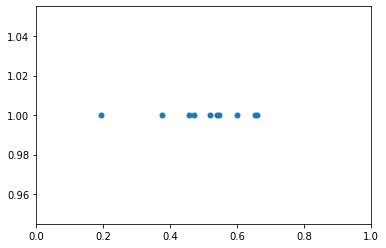

In [ ]:

a = results_ensemble[4]['predicted']
y = np.ones(np.shape(a))   # Make all y values the same
plt.plot(a,y,'.',ms = 10)  # Plot a line at each location specified in a
plt.xlim([0, 1])
# plt.axis('off')
plt.show()

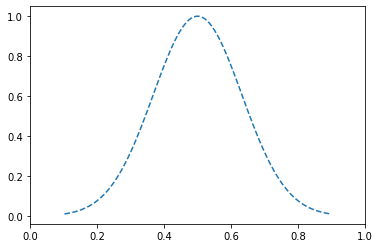

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
a = results_ensemble[4]['predicted']

def plot_norm_pdf(a, line_style = '--'):
    mu = np.mean(a)
    variance = np.var(a)
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
    pdf = stats.norm.pdf(x, mu, sigma)
    pdf = pdf/np.max(pdf)
    plt.plot(x, pdf,line_style)
    plt.xlim([0, 1])
    # plt.show()

plot_norm_pdf(a)


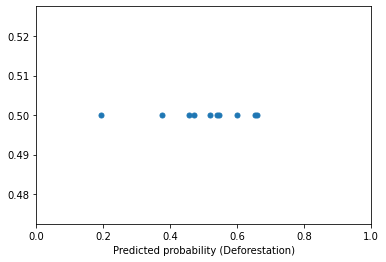

In [ ]:

def plot_points(a, line_style = '.'):
    y = np.ones(np.shape(a))*0.5   # Make all y values the same
    plt.plot(a,y,line_style,ms = 10)  # Plot a line at each location specified in a
    plt.xlim([0, 1])

    plt.xlabel('Predicted probability (Deforestation)')
    '''
    plt.tick_params(
        axis='y',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        left=False,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=False) # labels along the bottom edge are off
    '''
    # plt.axis('off')
    # plt.show()
    # plt.clf()
plot_points(a)


In [ ]:
import pathlib
folder_name = 'pdf_plot_results/' 
pathlib.Path(folder_name).mkdir(parents=True, exist_ok=True)

exp_id, 194
idx: 0, other uncertainty metrics: {'sUEO': 0.3845722890780702, 'ece_score': 0}
exp_id, 195
idx: 1, other uncertainty metrics: {'sUEO': 0.4216257755386668, 'ece_score': 0}
exp_id, 196
idx: 2, other uncertainty metrics: {'sUEO': 0.35993511082351887, 'ece_score': 0}
exp_id, 197
idx: 3, other uncertainty metrics: {'sUEO': 0.39539940415724506, 'ece_score': 0}
exp_id, 198
idx: 4, other uncertainty metrics: {'sUEO': 0.053239067948908085, 'ece_score': 0.5106524568504512}
exp_id, 199
idx: 5, other uncertainty metrics: {'sUEO': 0.42596983253086407, 'ece_score': 0.05624375500343817}
exp_id, 200
idx: 6, other uncertainty metrics: {'sUEO': 0.24002797100218876, 'ece_score': 0.09926059301226876}
exp_id, 201
idx: 7, other uncertainty metrics: {'sUEO': 0.37593417277851976, 'ece_score': 0.07479207562590515}
exp_id, 202
idx: 8, other uncertainty metrics: {'sUEO': 0.3972462833082261, 'ece_score': 0.08061046323488832}
exp_id, 203
idx: 9, other uncertainty metrics: {'sUEO': 0.41852756084078635,

d:\Jorge\deforestation_uncertainty\src\trainer\evidential.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return self._coef * np.multiply.reduce([xx ** (aa - 1)


exp_id, 194
idx: 0, other uncertainty metrics: {'sUEO': 0.3845722890780702, 'ece_score': 0}
exp_id, 195
idx: 1, other uncertainty metrics: {'sUEO': 0.4216257755386668, 'ece_score': 0}
exp_id, 196
idx: 2, other uncertainty metrics: {'sUEO': 0.35993511082351887, 'ece_score': 0}
exp_id, 197
idx: 3, other uncertainty metrics: {'sUEO': 0.39539940415724506, 'ece_score': 0}
exp_id, 198
idx: 4, other uncertainty metrics: {'sUEO': 0.053239067948908085, 'ece_score': 0.5106524568504512}
exp_id, 199
idx: 5, other uncertainty metrics: {'sUEO': 0.42596983253086407, 'ece_score': 0.05624375500343817}
exp_id, 200
idx: 6, other uncertainty metrics: {'sUEO': 0.24002797100218876, 'ece_score': 0.09926059301226876}
exp_id, 201
idx: 7, other uncertainty metrics: {'sUEO': 0.37593417277851976, 'ece_score': 0.07479207562590515}
exp_id, 202
idx: 8, other uncertainty metrics: {'sUEO': 0.3972462833082261, 'ece_score': 0.08061046323488832}
exp_id, 203
idx: 9, other uncertainty metrics: {'sUEO': 0.41852756084078635,

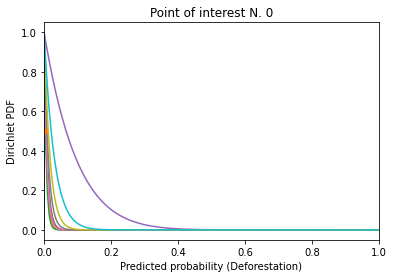

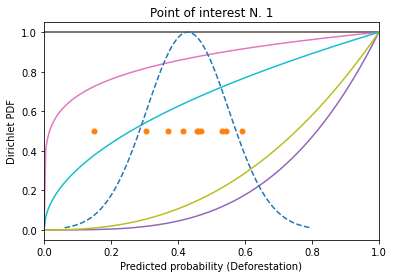

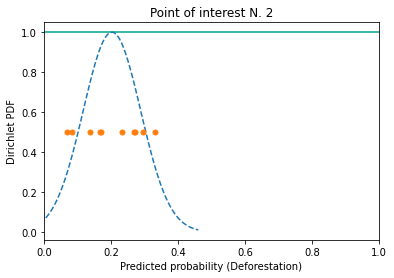

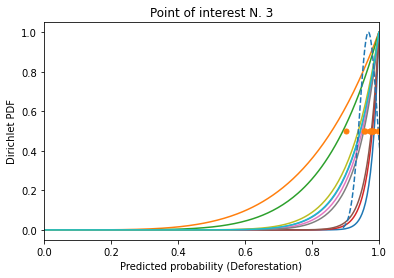

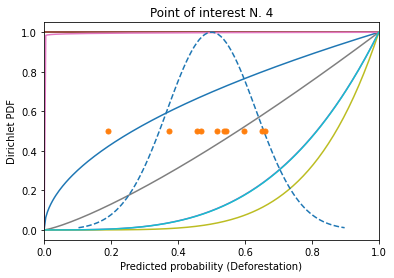

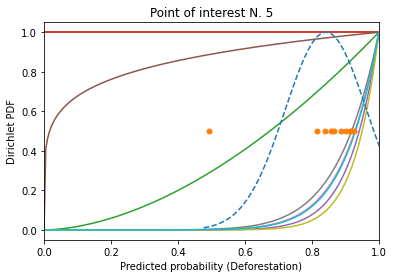

In [ ]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()
        
    for idx, result in enumerate(results):
        # print("idx: {}, alpha: {}".format(idx, result['snippet_poi_results'][poi_id]['alpha']))
        # if result['uncertainty_result']['metrics']['f1'] > 0:
        if True:
        
            print("exp_id,",result['uncertainty_result']['exp'])
            print("idx: {}, other uncertainty metrics: {}".format(idx, result['other_uncertainty_metrics']))


            
            getMassFcn2D(result['snippet_poi_results'][poi_id]['alpha'], normalize_pvals=True)
    # for idx, result in enumerate(results_mcd):
    #     plot_norm_pdf(result['snippet_poi_results'][poi_id]['predicted'], '*')
    plot_norm_pdf(results_ensemble[poi_id]['predicted'])
    plot_points(results_ensemble[poi_id]['predicted'], '.')
    plt.title('Point of interest N. {}'.format(poi_id))
    filename = "result_evidential_poi{}.png".format(poi_id)
    plt.savefig("{}/{}".format(folder_name, filename), bbox_inches ="tight", dpi=150)
            

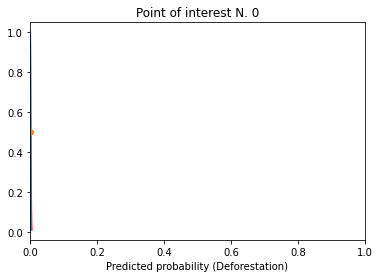

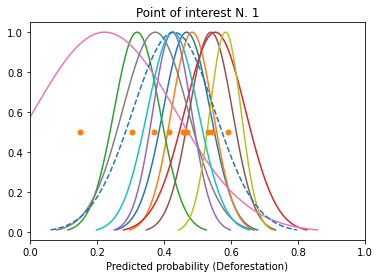

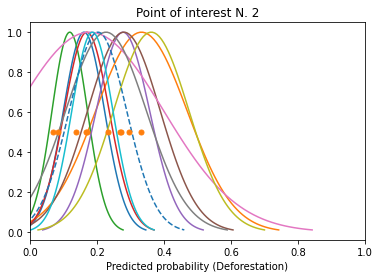

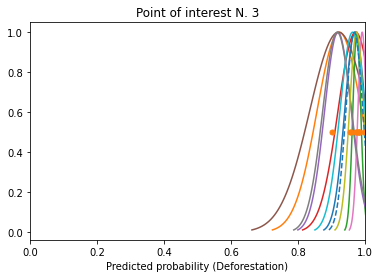

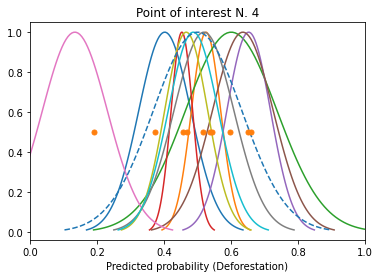

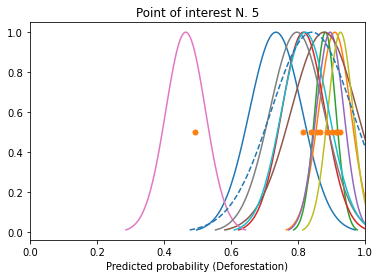

In [ ]:

import matplotlib.pyplot as plt
for poi_id in range(6):
    plt.figure()

    for idx, result in enumerate(results_mcd):
        plot_norm_pdf(result['snippet_poi_results'][poi_id]['predicted'], '-')
    plot_norm_pdf(results_ensemble[poi_id]['predicted'])
    plot_points(results_ensemble[poi_id]['predicted'], '.')
    plt.title('Point of interest N. {}'.format(poi_id))
    filename = "result_mcd_poi{}.png".format(poi_id)
    plt.savefig("{}/{}".format(folder_name, filename), bbox_inches ="tight", dpi=150)